In [75]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import os

In [91]:
home = "../.."
images_dir = os.path.join(home, "static/images/")
plt.rcParams['figure.figsize'] = [15, 5]

# 0. What’s an Empirical Cumulative Distribution Function?

## PDFs and CDFs

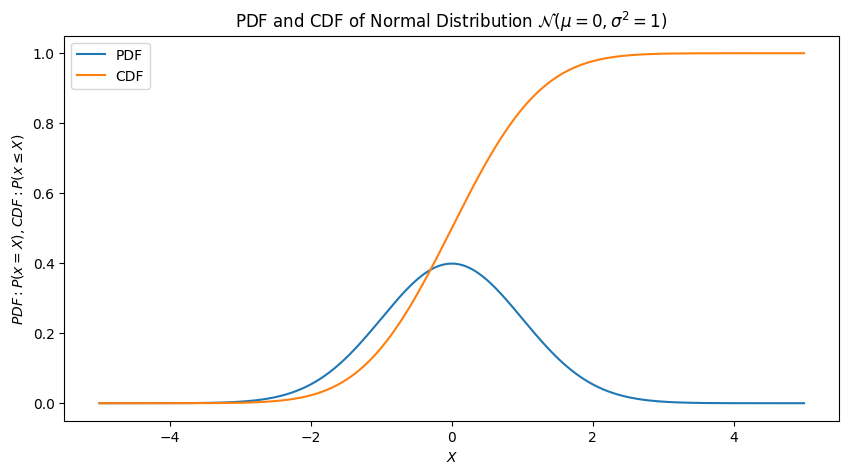

In [83]:
mean = 0
std = 1

# plot pdf
x = np.linspace(-5, 5, 10000)
pdf = scs.norm.pdf(x, loc=mean, scale=std)
cdf = scs.norm.cdf(x, loc=mean, scale=std)
plt.plot(x, pdf, label="PDF")
plt.plot(x, cdf, label="CDF")
plt.xlabel("$X$")
plt.ylabel("$PDF: P(x=X), CDF: P(x \leq X)$")
plt.legend()
plt.title("PDF and CDF of Normal Distribution $\mathcal{N}(\mu = 0, \sigma^2 = 1$)")
plt.savefig(os.path.join(images_dir, "normal-pdf-and-cdf.png"))

## Histograms and ECDFs

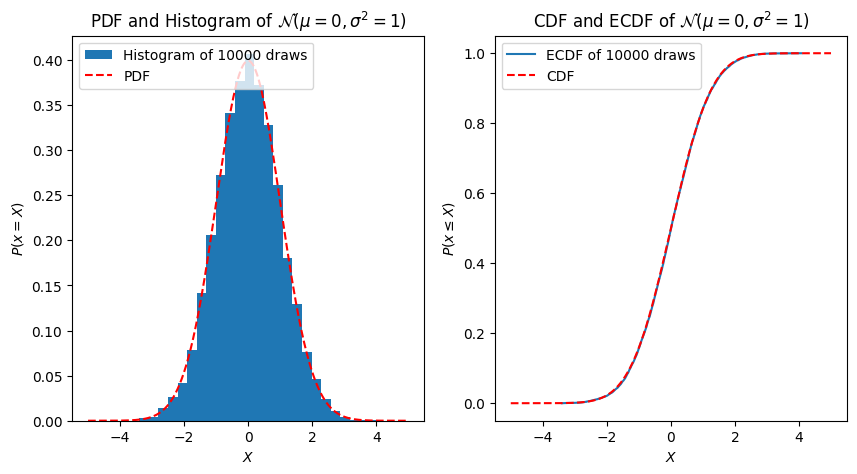

In [87]:
# set up
fig, axs = plt.subplots(1, 2)

## Histogram
# plot histogram
n_draws = 10000
gaussian_draws = np.random.normal(mean, std, size=n_draws)
axs[0].hist(gaussian_draws, bins=25, density=True, label=f"Histogram of {n_draws} draws")

# plot pdf
x = np.linspace(-5, 5, 10000)
pdf = scs.norm.pdf(x, loc=mean, scale=std)
axs[0].plot(x, pdf, 'r--', label="PDF")
axs[0].set_xlabel("$X$")
axs[0].set_ylabel("$P(x=X)$")
axs[0].legend(loc='upper left')
axs[0].set_title("PDF and Histogram of $\mathcal{N}(\mu = 0, \sigma^2 = 1$)")

## ECDF
# plot ECDF
axs[1].plot(np.sort(gaussian_draws), np.linspace(0, 1, n_draws), label=f"ECDF of {n_draws} draws")

# plot CDF
cdf = scs.norm.cdf(x, loc=mean, scale=std)
axs[1].plot(x, cdf, 'r--', label="CDF")
axs[1].set_xlabel("$X$")
axs[1].set_ylabel("$P(x \leq X)$")
axs[1].legend(loc='upper left')
axs[1].set_title("CDF and ECDF of $\mathcal{N}(\mu = 0, \sigma^2 = 1$)")

# Output
plt.savefig(os.path.join(images_dir, "normal-pdf-histogram-and-ecdf-cdf.png"))

# 1. 7 Reasons Why ECDFs Render Histograms Obsolete

## 1.1 Key Quartile Values Become Immediately Obvious

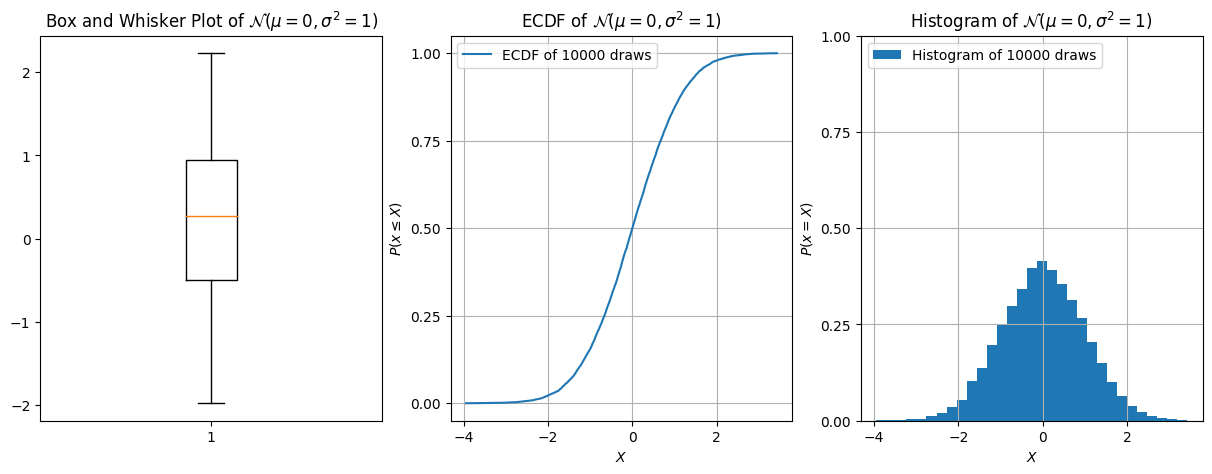

In [109]:
# set up
fig, axs = plt.subplots(1, 3)
y_ticks = np.linspace(0, 1, 5)

## Box Plot
axs[0].boxplot(gaussian_draws)
axs[0].set_title("Box and Whisker Plot of $\mathcal{N}(\mu = 0, \sigma^2 = 1$)")

## ECDF
# plot ECDF
n_draws = 10000
gaussian_draws = np.random.normal(mean, std, size=n_draws)
axs[1].plot(np.sort(gaussian_draws), np.linspace(0, 1, n_draws), label=f"ECDF of {n_draws} draws")
axs[1].set_yticks(y_ticks)
axs[1].set_xlabel("$X$")
axs[1].set_ylabel("$P(x \leq X)$")
axs[1].grid()
axs[1].legend(loc='upper left')
axs[1].set_title("ECDF of $\mathcal{N}(\mu = 0, \sigma^2 = 1$)")

## Histogram
# plot histogram
axs[2].hist(gaussian_draws, bins=31, density=True, label=f"Histogram of {n_draws} draws")
axs[2].set_yticks(y_ticks)
axs[2].set_xlabel("$X$")
axs[2].set_ylabel("$P(x=X)$")
axs[2].grid()
axs[2].legend(loc='upper left')
axs[2].set_title("Histogram of $\mathcal{N}(\mu = 0, \sigma^2 = 1$)")

# Output
plt.savefig(os.path.join(images_dir, "normal-histogram-boxplot-ecdf.png"))
plt.show()

## 1.2. ECDFs Remain Relatively High-Integrity Under Low Data Volume

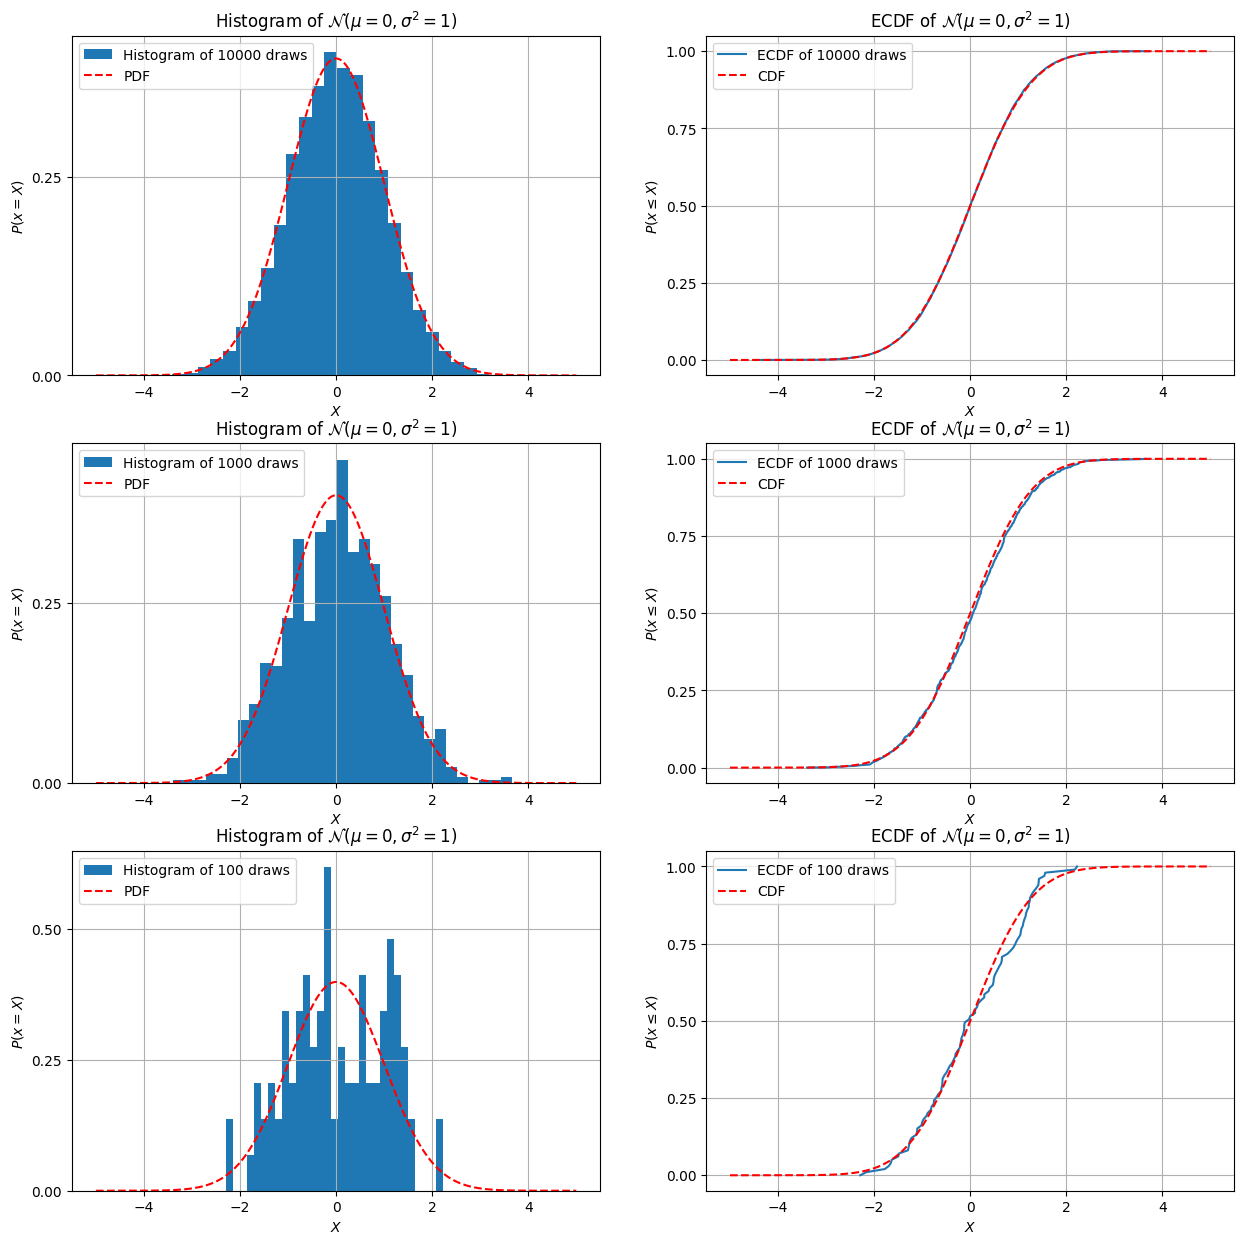

In [129]:
# set up
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
x = np.linspace(-5, 5, 10000)
pdf = scs.norm.pdf(x, loc=mean, scale=std)
cdf = scs.norm.cdf(x, loc=mean, scale=std)

for i, n_draws in enumerate([10000, 1000, 100]):
    
    gaussian_draws = np.random.normal(mean, std, size=n_draws)

    ## Histogram
    # plot histogram
    axs[i, 0].hist(gaussian_draws, bins=31, density=True, label=f"Histogram of {n_draws} draws")
    axs[i, 0].set_yticks(y_ticks)
    axs[i, 0].set_xlabel("$X$")
    axs[i, 0].set_ylabel("$P(x=X)$")
    axs[i, 0].grid()
    axs[i, 0].set_title("Histogram of $\mathcal{N}(\mu = 0, \sigma^2 = 1$)")
    axs[i, 0].plot(x, pdf, 'r--', label="PDF")
    axs[i, 0].legend(loc='upper left')
    
    ## ECDF
    # plot ECDF
    axs[i, 1].plot(np.sort(gaussian_draws), np.linspace(0, 1, n_draws), label=f"ECDF of {n_draws} draws")
    axs[i, 1].set_yticks(y_ticks)
    axs[i, 1].set_xlabel("$X$")
    axs[i, 1].set_ylabel("$P(x \leq X)$")
    axs[i, 1].grid()
    axs[i, 1].set_title("ECDF of $\mathcal{N}(\mu = 0, \sigma^2 = 1$)")
    axs[i, 1].plot(x, cdf, 'r--', label="CDF")
    axs[i, 1].legend(loc='upper left')

    # Output
    plt.savefig(os.path.join(images_dir, "normal-histogram-ecdf-by-n-draws.png"))

## 1.3. The Perils of Binning Artifacts, and the Disappearance of Multi-Modality

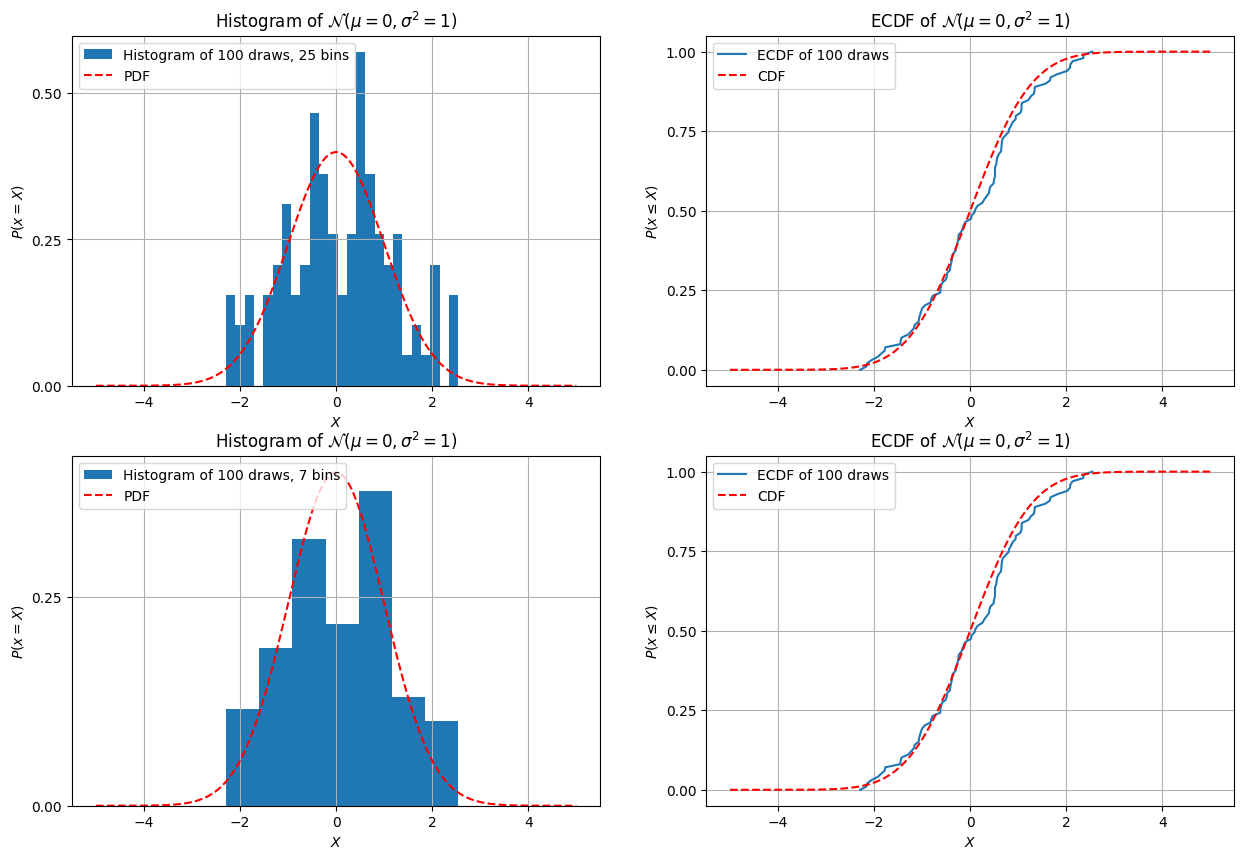

In [130]:
# set up
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
x = np.linspace(-5, 5, 10000)
pdf = scs.norm.pdf(x, loc=mean, scale=std)
cdf = scs.norm.cdf(x, loc=mean, scale=std)
n_draws = 100
gaussian_draws = np.random.normal(mean, std, size=n_draws)

for i, n_bins in enumerate([25, 7]):

    ## Histogram
    # plot histogram
    axs[i, 0].hist(gaussian_draws, bins=n_bins, density=True, label=f"Histogram of {n_draws} draws, {n_bins} bins")
    axs[i, 0].set_yticks(y_ticks)
    axs[i, 0].set_xlabel("$X$")
    axs[i, 0].set_ylabel("$P(x=X)$")
    axs[i, 0].grid()
    axs[i, 0].set_title("Histogram of $\mathcal{N}(\mu = 0, \sigma^2 = 1$)")
    axs[i, 0].plot(x, pdf, 'r--', label="PDF")
    axs[i, 0].legend(loc='upper left')
    
    ## ECDF
    # plot ECDF
    axs[i, 1].plot(np.sort(gaussian_draws), np.linspace(0, 1, n_draws), label=f"ECDF of {n_draws} draws")
    axs[i, 1].set_yticks(y_ticks)
    axs[i, 1].set_xlabel("$X$")
    axs[i, 1].set_ylabel("$P(x \leq X)$")
    axs[i, 1].grid()
    axs[i, 1].set_title("ECDF of $\mathcal{N}(\mu = 0, \sigma^2 = 1$)")
    axs[i, 1].plot(x, cdf, 'r--', label="CDF")
    axs[i, 1].legend(loc='upper left')

    # Output
    plt.savefig(os.path.join(images_dir, "normal-histogram-ecdf-by-n-bins.png"))